# Capstone Project : COVID-19 Predictions
---
# include starter summary

### Backstory

### Problem Statement

### Project Summary
---


Import Tools & Datasets

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
# import matplotlib.colors as mcolors
import seaborn as sns
sns.set()  # Set style & figures inline

import requests
import time
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import random
import math
import time
import datetime
# import operator 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('fivethirtyeight')
%matplotlib inline


C:\Users\domin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Fetch content by URL**

The data was collected from 2 sources:
1. https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series
2. https://co.vid19.sg/singapore/dashboard. \

No API or loop was needed to accumulate and collect the data

In [2]:
# importing confirmed cases
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# importing death cases
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# importing recovered cases
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# # importing updated cases
# latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2020.csv')

In [3]:
# include Singapore specific dataframe
sg_df = pd.read_csv('./datasets/df_sg_covid.csv')
age_details_df = pd.read_csv('./datasets/age_details.csv')

In [4]:
# world_population = pd.read_csv('./datasets/population_by_country_2020.csv')
# world_population.info()

---

In [5]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

print('The number of confirmed cases worldwide is {}'.format(world_confirmed))
print('The number of recovered cases worldwide is {}'.format(world_recovered))
print('The number of death cases worldwide is {}'.format(world_deaths))
print('The number of active cases worldwide is {}'.format(world_active))

The number of confirmed cases worldwide is 4/22/20    2624089
dtype: int64
The number of recovered cases worldwide is 4/22/20    709694
dtype: int64
The number of death cases worldwide is 4/22/20    183064
dtype: int64
The number of active cases worldwide is 4/22/20    2097459
dtype: int64


C:\Users\domin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


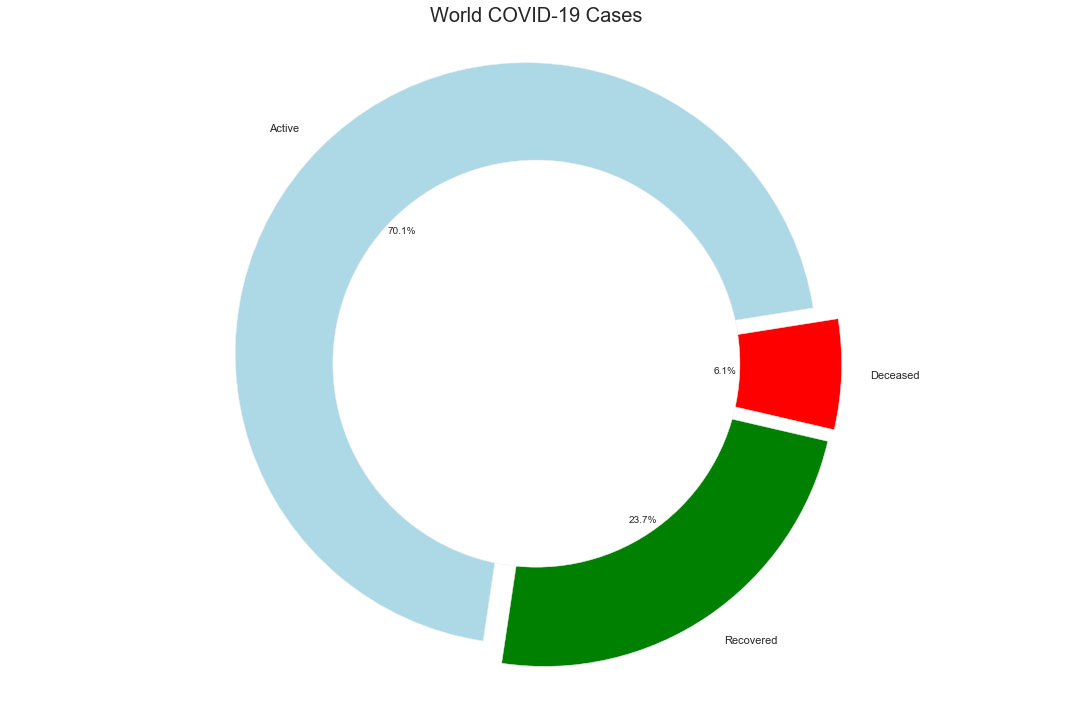

In [6]:
# pie chart for global covid data as of day -1
labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['lightblue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [7]:
# ASEAN countries as countries of interest
coi = ["Brunei", "Burma", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam"]

In [8]:
# set indexed by date
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))

# creating empty list to be appended
global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

# function for grouping countries
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

In [9]:
for country in coi:
    k =df1[df1['Country/Region'] == country].loc[:,'1/22/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/22/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/22/20':]
    global_recovered[country] = k.values.tolist()[0]
    
for country in coi:
    k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
    global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,30))

plt.suptitle('Active, Recovered, Deaths in ASEAN Countries as of April 20',fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,11):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.xaxis_date()
    ax.bar(dates, global_active[coi[k]], color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates, global_recovered[coi[k]], color='grey',label = 'Recovered');
    ax.bar(dates, global_deaths[coi[k]], color='red',label = 'Death');   
    plt.title(coi[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)


**Initial data shows the circumstance for countries with:** 
- Certain Recovery : Brunei, Cambodia, Malaysia Thailand, Vietnam (Flattened the Curve!) 
- Uncertain Recovery : Laos and Singapore (Hopeful to be Flattening!) 
- Burma (Myanmar), Indonesia, and Philippines showing very few recoveries or at a rate similar to those of deaths.

Comparison of cases amongst ASEAN Countries

In [28]:
# function for grouping countries
# returns data for countries indexed by date

def group_by_country(raw_data):
    
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

# function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=True):

    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='upper left')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

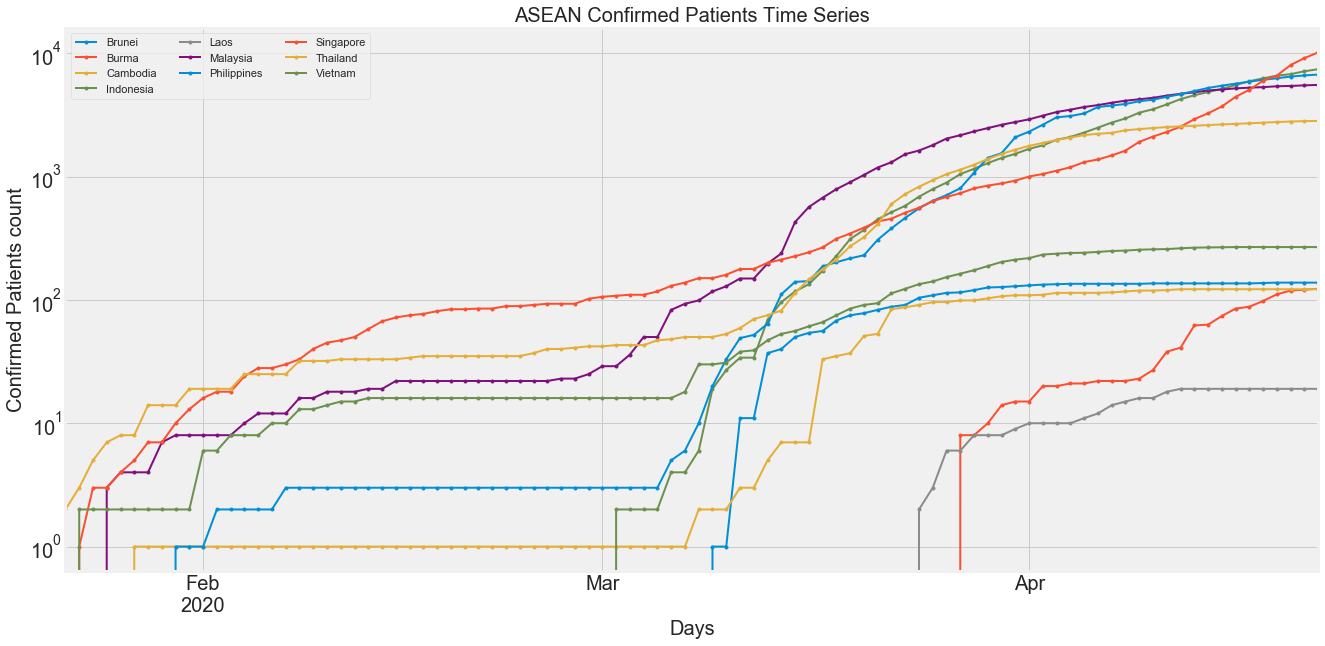

In [29]:
# ASEAN countries comparison of confirmed cases
plot_time_series(group_by_country(confirmed_df)[coi], 'ASEAN Confirmed Patients Time Series', 'Days', 'Confirmed Patients count')

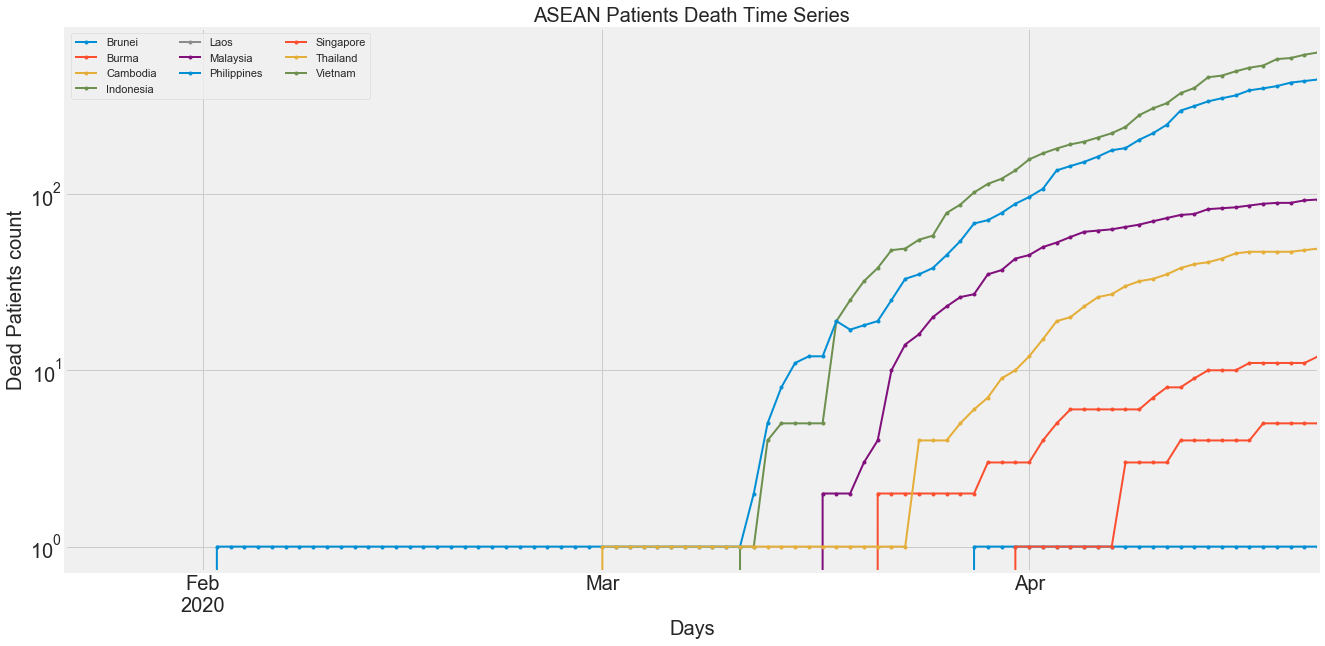

In [30]:
# ASEAN countries comparison of death cases
plot_time_series(group_by_country(deaths_df)[coi], 'ASEAN Patients Death Time Series', 'Days', 'Dead Patients count')

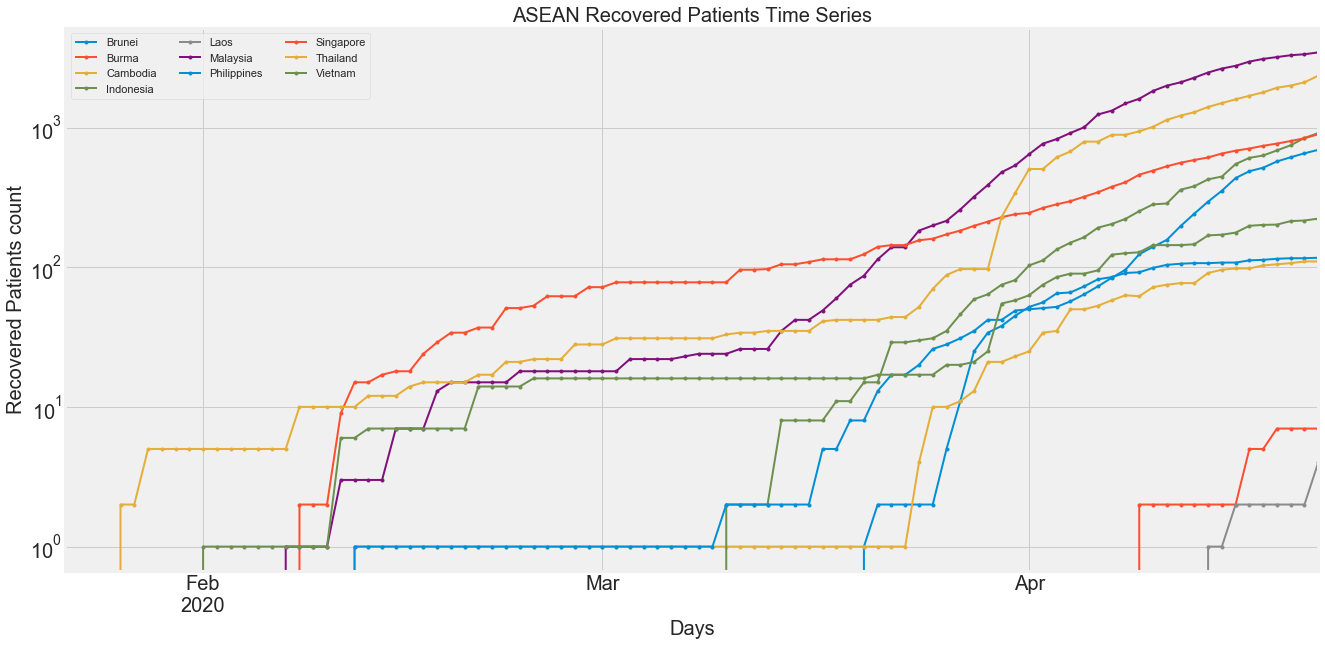

In [31]:
# ASEAN countries comparison of recovered cases
plot_time_series(group_by_country(recovered_df)[coi], 'ASEAN Recovered Patients Time Series', 'Days', 'Recovered Patients count')

### Bringing in the Singapore Contextual Data

In [10]:
# SG only data 
sg_df

case                                            patient  age  \
0     6560.0                       37 Year Old Male Bangladeshi   37   
1     6558.0                       37 Year Old Male Bangladeshi   37   
2     6531.0                       31 Year Old Male Bangladeshi   31   
3     6529.0                            43 Year Old Male Indian   43   
4     6509.0                        31 Year Old Male Myanmarian   31   
5     6497.0                       30 Year Old Male Bangladeshi   30   
6     6489.0                       23 Year Old Male Bangladeshi   23   
7     6472.0                       26 Year Old Male Bangladeshi   26   
8     6471.0                       36 Year Old Male Bangladeshi   36   
9     6469.0                       28 Year Old Male Bangladeshi   28   
10    6453.0                       39 Year Old Male Bangladeshi   39   
11    6452.0                       41 Year Old Male Bangladeshi   41   
12    6449.0                            36 Year Old Male Indian   36   
13    6439.0                            26 Year Old Male Indian   26   
14    6428.0                       81 Year Old Male Singaporean   81   
15    6410.0                       36 Year Old Male Bangladeshi   36   
16    6407.0                       27 Year Old Male Bangladeshi   27   
17    6401.0                       37 Year Old Male Bangladeshi   37   
18    6386.0                            38 Year Old Male Indian   38   
19    6365.0                       27 Year Old Male Bangladeshi   27   
20    6348.0                       41 Year Old Male Bangladeshi   41   
21    6344.0                       33 Year Old Male Bangladeshi   33   
22    6338.0                            26 Year Old Male Indian   26   
23    6337.0                            27 Year Old Male Indian   27   
24    6323.0                       12 Year Old Male Singaporean   12   
25    6321.0                       40 Year Old Male Bangladeshi   40   
26    6302.0                            29 Year Old Male Indian   29   
27    6295.0                       37 Year Old Male Bangladeshi   37   
28    6281.0                            31 Year Old Male Indian   31   
29    6264.0                            37 Year Old Male Indian   37   
30    6263.0                       41 Year Old Male Bangladeshi   41   
31    6260.0                            30 Year Old Male Indian   30   
32    6244.0                       23 Year Old Male Bangladeshi   23   
33    6239.0                            39 Year Old Male Indian   39   
34    6224.0                       33 Year Old Male Bangladeshi   33   
35    6218.0                            33 Year Old Male Indian   33   
36    6198.0                            36 Year Old Male Indian   36   
37    6177.0                            40 Year Old Male Indian   40   
38    6164.0                       40 Year Old Male Bangladeshi   40   
39    6145.0                       26 Year Old Male Bangladeshi   26   
40    6162.0                            41 Year Old Male Indian   41   
41    6140.0                            25 Year Old Male Indian   25   
42    6135.0                       35 Year Old Male Bangladeshi   35   
43    6124.0                       34 Year Old Male Bangladeshi   34   
44    6115.0                            26 Year Old Male Indian   26   
45    6103.0                       45 Year Old Male Bangladeshi   45   
46    6094.0                            26 Year Old Male Indian   26   
47    6078.0                       34 Year Old Male Bangladeshi   34   
48    6073.0                       34 Year Old Male Bangladeshi   34   
49    6053.0                       30 Year Old Male Bangladeshi   30   
50    6044.0                       41 Year Old Male Bangladeshi   41   
51    6032.0                       22 Year Old Male Bangladeshi   22   
52    6011.0                            32 Year Old Male Indian   32   
53    5991.0                            36 Year Old Male Indian   36   
54    5990.0                            34 Year 

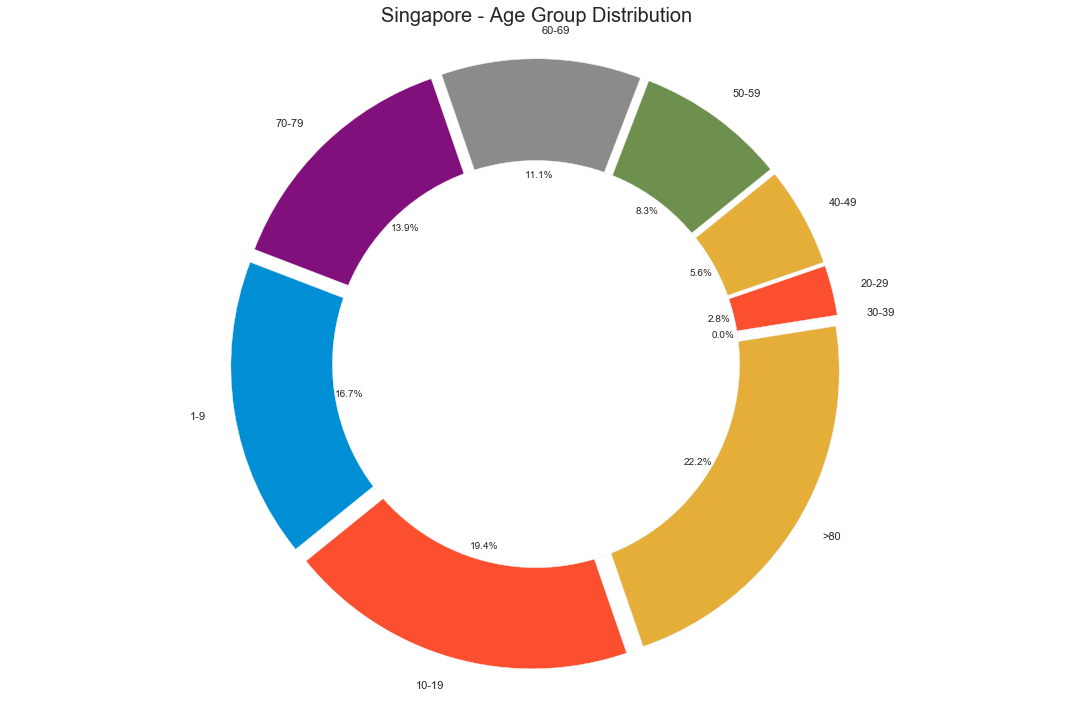

In [17]:
# plot pie chart showing SG age group distribution for covid cases
labels = list(age_details_df.group)
sizes = list(age_details_df.index)

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Singapore - Age Group Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

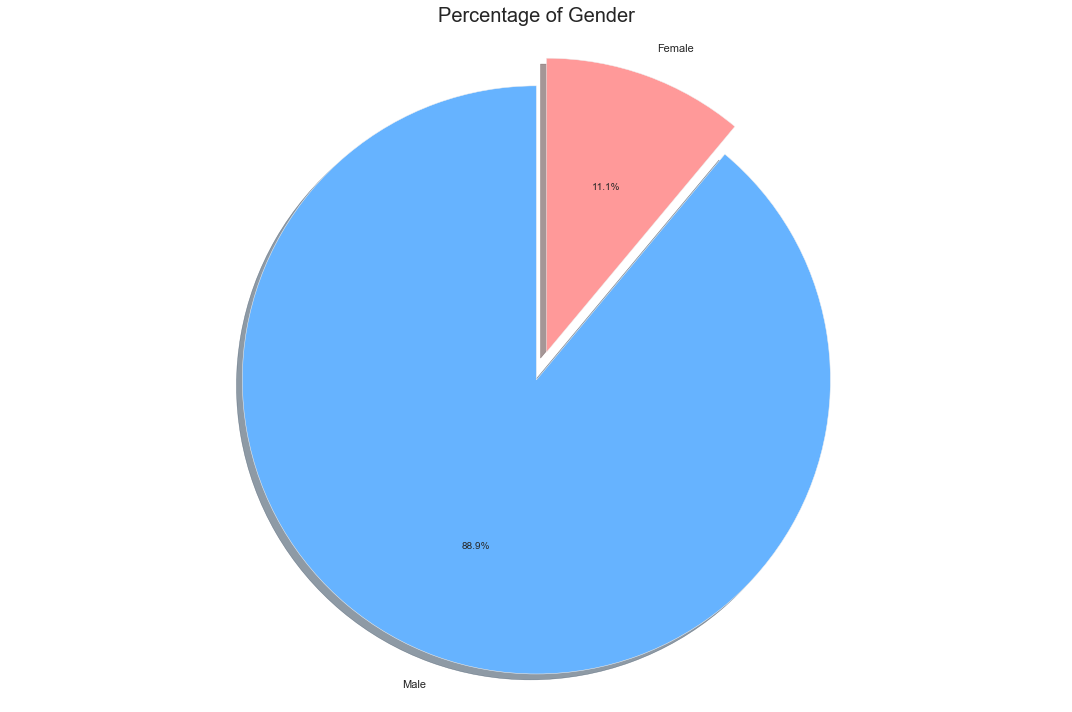

In [22]:
# plot pie chart showing SG gender distribution for covid cases
labels = ['Male', 'Female']
sizes = []

# no null values for genger
sizes.append(list(sg_df['gender'].value_counts())[0])
sizes.append(list(sg_df['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

In [48]:
# plotting total cases for SG
k = df1[df1['Country/Region']=='Singapore'].loc[:,'1/22/20':]
SG_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='Singapore'].loc[:,'1/22/20':]
SG_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='Singapore'].loc[:,'1/22/20':]
SG_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in Singapore" , fontsize = 20)
# plt.axvline(x=4/7/20) include for representation fo start of lockdown

# plt.plot_date(y=0, x="2020-04-07", label = "Lockdown", linestyle ='-',color = '0')
ax1 = plt.plot_date(y= SG_confirmed,x= dates,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= SG_recovered,x= dates,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= SG_deaths,x= dates,label = 'Death',linestyle ='-',color = 'r')
plt.legend();

In [49]:
# include moving average for SG/ASEAN for confirmed cases

In [ ]:
train['day'] = train['Date'].dt.day
train['month'] = train['Date'].dt.month
train['dayofweek'] = train['Date'].dt.dayofweek
train['dayofyear'] = train['Date'].dt.dayofyear
train['quarter'] = train['Date'].dt.quarter
train['weekofyear'] = train['Date'].dt.weekofyear
test['day'] = test['Date'].dt.day
test['month'] = test['Date'].dt.month
test['dayofweek'] = test['Date'].dt.dayofweek
test['dayofyear'] = test['Date'].dt.dayofyear
test['quarter'] = test['Date'].dt.quarter
test['weekofyear'] = test['Date'].dt.weekofyear
countries = list(train['Country_Region'].unique())
india_code = countries.index('India')
train = train.drop(['Date','Id'],1)
test =  test.drop(['Date'],1)

train.Province_State.fillna('NaN', inplace=True)
oe = OrdinalEncoder()
train[['Province_State','Country_Region']] = oe.fit_transform(train.loc[:,['Province_State','Country_Region']])

test.Province_State.fillna('NaN', inplace=True)
oe = OrdinalEncoder()
test[['Province_State','Country_Region']] = oe.fit_transform(test.loc[:,['Province_State','Country_Region']])

In [50]:
moot['day'] = moot['Date'].dt.day


NameError: name 'moot' is not defined

In [51]:
confirmed_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        1        1        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        1        1        1       1       1       1       1       1       1   
1        0        0        0       0       0       0       0       0       0   
2        1        1        1       1       3       5      12      12      17   
3        0        0        0       0       1       1       1       1       1   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       1       4       4        5        7        7        7       11   
1       0       0       2       10       12       23       33       38   
2      17      19      20       20       20       24       26       37   
3       1       1       1        1        1        1        1        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0       16       21       22       22       22       24       24       40   
1       42       51       55       59       64       70       76       89   
2       48       54       60       74       87       90      139      201   
3        1        2       39       39       53       75       88      113   
4        0        0        0        0        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0       40       74       84       94      110      110      120      170   
1      104      123      146      174      186      197      212      223   
2      230      264      302      367      409   

In [ ]:
age_details_df = pd.DataFrame(df.agegroup.value_counts())
age_details_df.reset_index(inplace=True)
age_details_df["group"] = age_details_df['index']
age_details_df.rename(columns={"agegroup": "count"})
age_details_df.drop(['index'], axis=1, inplace=True)

age_details_df

In [78]:
trainstuff = pd.DataFrame(group_by_country(confirmed_df)["Afghanistan"])

trainstuff.reset_index(inplace=True)

trainstuff["country"] = "Afghanistan"
trainstuff["confirmed_cases"] = trainstuff["Afghanistan"]
trainstuff["dates"] = trainstuff["index"]
trainstuff.drop(['index', 'Afghanistan'], axis=1, inplace=True)

trainstuff

country  confirmed_cases      dates
0   Afghanistan                0 2020-01-22
1   Afghanistan                0 2020-01-23
2   Afghanistan                0 2020-01-24
3   Afghanistan                0 2020-01-25
4   Afghanistan                0 2020-01-26
5   Afghanistan                0 2020-01-27
6   Afghanistan                0 2020-01-28
7   Afghanistan                0 2020-01-29
8   Afghanistan                0 2020-01-30
9   Afghanistan                0 2020-01-31
10  Afghanistan                0 2020-02-01
11  Afghanistan                0 2020-02-02
12  Afghanistan                0 2020-02-03
13  Afghanistan                0 2020-02-04
14  Afghanistan                0 2020-02-05
15  Afghanistan                0 2020-02-06
16  Afghanistan                0 2020-02-07
17  Afghanistan                0 2020-02-08
18  Afghanistan                0 2020-02-09
19  Afghanistan                0 2020-02-10
20  Afghanistan                0 2020-02-11
21  Afghanistan                0 2020-02-12
22  Afghanistan                0 2020-02-13
23  Afghanistan                0 2020-02-14
24  Afghanistan                0 2020-02-15
25  Afghanistan                0 2020-02-16
26  Afghanistan                0 2020-02-17
27  Afghanistan                0 2020-02-18
28  Afghanistan                0 2020-02-19
29  Afghanistan                0 2020-02-20
30  Afghanistan                0 2020-02-21
31  Afghanistan                0 2020-02-22
32  Afghanistan                0 2020-02-23
33  Afghanistan                1 2020-02-24
34  Afghanistan                1 2020-02-25
35  Afghanistan                1 2020-02-26
36  Afghanistan                1 2020-02-27
37  Afghanistan                1 2020-02-28
38  Afghanistan                1 2020-02-29
39  Afghanistan                1 2020-03-01
40  Afghanistan                1 2020-03-02
41  Afghanistan                1 2020-03-03
42  Afghanistan                1 2020-03-04
43  Afghanistan                1 2020-03-05
44  Afghanistan                1 2020-03-06
45  Afghanistan                1 2020-03-07
46  Afghanistan                4 2020-03-08
47  Afghanistan                4 2020-03-09
48  Afghanistan                5 2020-03-10
49  Afghanistan                7 2020-03-11
50  Afghanistan                7 2020-03-12
51  Afghanistan                7 2020-03-13
52  Afghanistan               11 2020-03-14
53  Afghanistan               16 2020-03-15
54  Afghanistan               21 2020-03-16
55  Afghanistan               22 2020-03-17
56  Afghanistan               22 2020-03-18
57  Afghanistan               22 2020-03-19
58  Afghanistan               24 2020-03-20
59  Afghanistan               24 2020-03-21
60  Afghanistan               40 2020-03-22
61  Afghanistan               40 2020-03-23
62  Afghanistan               74 2020-03-24
63  Afghanistan               84 2020-03-25
64  Afghanistan               94 2020-03-26
65  Afghanistan              110 2020-03-27
66  Afghanistan              110 2020-03-28
67  Afghanistan              120 2020-03-29
68  Afghanistan              170 2020-03-30
69  Afghanistan              174 2020-03-31
70  Afghanistan              237 2020-04-01
71  Afghanistan              273 2020-04-02
72  Afghanistan              281 2020-04-03
73  Afghanistan              299 2020-04-04
74  Afghanistan              349 2020-04-05
75  Afghanistan              367 2020-04-06
76  Afghanistan              423 2020-04-07
77  Afghanistan              444 2020-04-08
78  Afghanistan              484 2020-04-09
79  Afghanistan              521 2020-04-10
80  Afghanistan              555 2020-04-11
81  Afghanistan              607 2020-04-12
82  Afghanistan              665 2020-04-13
83  Afghanistan              714 2020-04-14
84  Afghanistan              784 2020-04-15
85  Afghanistan              840 2020-04-16
86  Afghanistan              906 2020-04-17
87  Afghanistan              933 2020-04-18
88  Afghanistan              996 2020-04-19
89  Afghanistan             1026 2020-04-20
90  

In [86]:
trainstuffs = pd.DataFrame(group_by_country(deaths_df)["Afghanistan"])

trainstuffs.reset_index(inplace=True)

trainstuffs["country"] = "Afghanistan"
trainstuffs["death_cases"] = trainstuffs["Afghanistan"]
trainstuffs["dates"] = trainstuffs["index"]
trainstuffs.drop(['index', 'Afghanistan'], axis=1, inplace=True)
trainstuffs

country  death_cases      dates
0   Afghanistan            0 2020-01-22
1   Afghanistan            0 2020-01-23
2   Afghanistan            0 2020-01-24
3   Afghanistan            0 2020-01-25
4   Afghanistan            0 2020-01-26
5   Afghanistan            0 2020-01-27
6   Afghanistan            0 2020-01-28
7   Afghanistan            0 2020-01-29
8   Afghanistan            0 2020-01-30
9   Afghanistan            0 2020-01-31
10  Afghanistan            0 2020-02-01
11  Afghanistan            0 2020-02-02
12  Afghanistan            0 2020-02-03
13  Afghanistan            0 2020-02-04
14  Afghanistan            0 2020-02-05
15  Afghanistan            0 2020-02-06
16  Afghanistan            0 2020-02-07
17  Afghanistan            0 2020-02-08
18  Afghanistan            0 2020-02-09
19  Afghanistan            0 2020-02-10
20  Afghanistan            0 2020-02-11
21  Afghanistan            0 2020-02-12
22  Afghanistan            0 2020-02-13
23  Afghanistan            0 2020-02-14
24  Afghanistan            0 2020-02-15
25  Afghanistan            0 2020-02-16
26  Afghanistan            0 2020-02-17
27  Afghanistan            0 2020-02-18
28  Afghanistan            0 2020-02-19
29  Afghanistan            0 2020-02-20
30  Afghanistan            0 2020-02-21
31  Afghanistan            0 2020-02-22
32  Afghanistan            0 2020-02-23
33  Afghanistan            0 2020-02-24
34  Afghanistan            0 2020-02-25
35  Afghanistan            0 2020-02-26
36  Afghanistan            0 2020-02-27
37  Afghanistan            0 2020-02-28
38  Afghanistan            0 2020-02-29
39  Afghanistan            0 2020-03-01
40  Afghanistan            0 2020-03-02
41  Afghanistan            0 2020-03-03
42  Afghanistan            0 2020-03-04
43  Afghanistan            0 2020-03-05
44  Afghanistan            0 2020-03-06
45  Afghanistan            0 2020-03-07
46  Afghanistan            0 2020-03-08
47  Afghanistan            0 2020-03-09
48  Afghanistan            0 2020-03-10
49  Afghanistan            0 2020-03-11
50  Afghanistan            0 2020-03-12
51  Afghanistan            0 2020-03-13
52  Afghanistan            0 2020-03-14
53  Afghanistan            0 2020-03-15
54  Afghanistan            0 2020-03-16
55  Afghanistan            0 2020-03-17
56  Afghanistan            0 2020-03-18
57  Afghanistan            0 2020-03-19
58  Afghanistan            0 2020-03-20
59  Afghanistan            0 2020-03-21
60  Afghanistan            1 2020-03-22
61  Afghanistan            1 2020-03-23
62  Afghanistan            1 2020-03-24
63  Afghanistan            2 2020-03-25
64  Afghanistan            4 2020-03-26
65  Afghanistan            4 2020-03-27
66  Afghanistan            4 2020-03-28
67  Afghanistan            4 2020-03-29
68  Afghanistan            4 2020-03-30
69  Afghanistan            4 2020-03-31
70  Afghanistan            4 2020-04-01
71  Afghanistan            6 2020-04-02
72  Afghanistan            6 2020-04-03
73  Afghanistan            7 2020-04-04
74  Afghanistan            7 2020-04-05
75  Afghanistan           11 2020-04-06
76  Afghanistan           14 2020-04-07
77  Afghanistan           14 2020-04-08
78  Afghanistan           15 2020-04-09
79  Afghanistan           15 2020-04-10
80  Afghanistan           18 2020-04-11
81  Afghanistan           18 2020-04-12
82  Afghanistan           21 2020-04-13
83  Afghanistan           23 2020-04-14
84  Afghanistan           25 2020-04-15
85  Afghanistan           30 2020-04-16
86  Afghanistan           30 2020-04-17
87  Afghanistan           30 2020-04-18
88  Afghanistan           33 2020-04-19
89  Afghanistan           36 2020-04-20
90  Afghanistan           36 2020-04-21
91  Afghanistan           40 2020-04-22

In [72]:
trainstuff

index  Afghanistan      country
0  2020-01-22            0  Afghanistan
1  2020-01-23            0  Afghanistan
2  2020-01-24            0  Afghanistan
3  2020-01-25            0  Afghanistan
4  2020-01-26            0  Afghanistan
5  2020-01-27            0  Afghanistan
6  2020-01-28            0  Afghanistan
7  2020-01-29            0  Afghanistan
8  2020-01-30            0  Afghanistan
9  2020-01-31            0  Afghanistan
10 2020-02-01            0  Afghanistan
11 2020-02-02            0  Afghanistan
12 2020-02-03            0  Afghanistan
13 2020-02-04            0  Afghanistan
14 2020-02-05            0  Afghanistan
15 2020-02-06            0  Afghanistan
16 2020-02-07            0  Afghanistan
17 2020-02-08            0  Afghanistan
18 2020-02-09            0  Afghanistan
19 2020-02-10            0  Afghanistan
20 2020-02-11            0  Afghanistan
21 2020-02-12            0  Afghanistan
22 2020-02-13            0  Afghanistan
23 2020-02-14            0  Afghanistan
24 2020-02-15            0  Afghanistan
25 2020-02-16            0  Afghanistan
26 2020-02-17            0  Afghanistan
27 2020-02-18            0  Afghanistan
28 2020-02-19            0  Afghanistan
29 2020-02-20            0  Afghanistan
30 2020-02-21            0  Afghanistan
31 2020-02-22            0  Afghanistan
32 2020-02-23            0  Afghanistan
33 2020-02-24            1  Afghanistan
34 2020-02-25            1  Afghanistan
35 2020-02-26            1  Afghanistan
36 2020-02-27            1  Afghanistan
37 2020-02-28            1  Afghanistan
38 2020-02-29            1  Afghanistan
39 2020-03-01            1  Afghanistan
40 2020-03-02            1  Afghanistan
41 2020-03-03            1  Afghanistan
42 2020-03-04            1  Afghanistan
43 2020-03-05            1  Afghanistan
44 2020-03-06            1  Afghanistan
45 2020-03-07            1  Afghanistan
46 2020-03-08            4  Afghanistan
47 2020-03-09            4  Afghanistan
48 2020-03-10            5  Afghanistan
49 2020-03-11            7  Afghanistan
50 2020-03-12            7  Afghanistan
51 2020-03-13            7  Afghanistan
52 2020-03-14           11  Afghanistan
53 2020-03-15           16  Afghanistan
54 2020-03-16           21  Afghanistan
55 2020-03-17           22  Afghanistan
56 2020-03-18           22  Afghanistan
57 2020-03-19           22  Afghanistan
58 2020-03-20           24  Afghanistan
59 2020-03-21           24  Afghanistan
60 2020-03-22           40  Afghanistan
61 2020-03-23           40  Afghanistan
62 2020-03-24           74  Afghanistan
63 2020-03-25           84  Afghanistan
64 2020-03-26           94  Afghanistan
65 2020-03-27          110  Afghanistan
66 2020-03-28          110  Afghanistan
67 2020-03-29          120  Afghanistan
68 2020-03-30          170  Afghanistan
69 2020-03-31          174  Afghanistan
70 2020-04-01          237  Afghanistan
71 2020-04-02          273  Afghanistan
72 2020-04-03          281  Afghanistan
73 2020-04-04          299  Afghanistan
74 2020-04-05          349  Afghanistan
75 2020-04-06          367  Afghanistan
76 2020-04-07          423  Afghanistan
77 2020-04-08          444  Afghanistan
78 2020-04-09          484  Afghanistan
79 2020-04-10          521  Afghanistan
80 2020-04-11          555  Afghanistan
81 2020-04-12          607  Afghanistan
82 2020-04-13          665  Afghanistan
83 2020-04-14          714  Afghanistan
84 2020-04-15          784  Afghanistan
85 2020-04-16          840  Afghanistan
86 2020-04-17          906  Afghanistan
87 2020-04-18          933  Afghanistan
88 2020-04-19          996  Afghanistan
89 2020-04-20         1026  Afghanistan
90 2020-04-21         1092  Afghanistan
91 2020-04-22         1176  Afghanistan

In [80]:
group_by_country(deaths_df)["Afghanistan"]

2020-01-22     0
2020-01-23     0
2020-01-24     0
2020-01-25     0
2020-01-26     0
2020-01-27     0
2020-01-28     0
2020-01-29     0
2020-01-30     0
2020-01-31     0
2020-02-01     0
2020-02-02     0
2020-02-03     0
2020-02-04     0
2020-02-05     0
2020-02-06     0
2020-02-07     0
2020-02-08     0
2020-02-09     0
2020-02-10     0
2020-02-11     0
2020-02-12     0
2020-02-13     0
2020-02-14     0
2020-02-15     0
2020-02-16     0
2020-02-17     0
2020-02-18     0
2020-02-19     0
2020-02-20     0
2020-02-21     0
2020-02-22     0
2020-02-23     0
2020-02-24     0
2020-02-25     0
2020-02-26     0
2020-02-27     0
2020-02-28     0
2020-02-29     0
2020-03-01     0
2020-03-02     0
2020-03-03     0
2020-03-04     0
2020-03-05     0
2020-03-06     0
2020-03-07     0
2020-03-08     0
2020-03-09     0
2020-03-10     0
2020-03-11     0
2020-03-12     0
2020-03-13     0
2020-03-14     0
2020-03-15     0
2020-03-16     0
2020-03-17     0
2020-03-18     0
2020-03-19     0
2020-03-20    